# Overview: 
The dataset I chose for this challenge is related to a survey conducted in a Slovakia university in 2013. The survey touches on a wide range of topics, from music and movie preferences, to hobbies, interests, and personality traits. The dataset has 1010 obversations and 150 columns. The dataset itself was available for download via Kaggle at the following link:

https://www.kaggle.com/miroslavsabo/young-people-survey

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
#Read the data in
survey_raw = pd.read_csv('student survey responses.csv')

In [4]:
#Get a feel for number of observations, columns
survey_raw.shape

(1010, 150)

In [5]:
survey_raw.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [41]:
#Since there are a lot of columns, change default. In the describe() method, pass the 'include' argument so that we can understand 
#any categorical variables as well

pd.options.display.max_columns = 150
survey_raw.describe(include='all')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1002,1005,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1008,1008,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1010,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000,1004,1007,1009,1008,1006,1006
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [42]:
#Two ways to get all missing values in the DataFrame

#1 Chain isnull() and sum() 
missing_values_count = survey_raw.isnull().sum()

# 2 Define a function
def missing(x):
  return sum(x.isnull())

print("Missing values per column:")
print(survey_raw.apply(missing, axis=0))

Missing values per column:
Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western         

In [85]:
#Calculate the variance across the DataFrame

survey_raw.var().nlargest(25)

Weight                 191.533443
Height                 100.490700
Age                      8.002336
Elections                2.479613
Pets                     2.388168
Spiders                  2.382995
Musical instruments      2.288715
Criminal damage          2.263336
Active sport             2.262351
Snakes                   2.252947
Reading                  2.237789
God                      2.199318
Dancing                  2.103656
Cars                     2.075987
Adrenaline sports        2.019200
Horror                   1.991141
Writing notes            1.983094
Passive sport            1.974100
Rats                     1.961666
Ageing                   1.922289
Biology                  1.915806
Medicine                 1.905358
Final judgement          1.902661
Chemistry                1.899675
Hiphop, Rap              1.892486
dtype: float64

Based on the 'describe' output above, we can discuss our variable types at a high level. 

Since this is survey data, almost all (135 out of 150) are continuous (ordinal) variables in a 1-5 format. There are 4 additional continuous (ratio) variables - Age, Height, Weight and Number of siblings. Finally, the remaining variables are categorical (11 out of 150) - Smoking, Alchohol, Punctuality, Lying, Internet Usage, Gender, Left-right handed, Education, Only child, Village-town, and House-block of flats.

For the purpose of this challenge, I will focus primarily on the following variables:
    Gender (outcome) - Categorical
    Smoking - Categorial
    Alcohol - Categorical
    Healthy eating (healthy lifestyle) - Continuous
    Hypochondria - Continuous
    Health - Continuous
    Spending on healthy eating - Continuous

In [43]:
#Create a clean DataFrame with dropped NaN's

survey_clean = survey_raw.dropna(subset=['Gender', 'Smoking', 'Alcohol', 'Healthy eating',
                                         'Hypochondria', 'Health', 'Spending on healthy eating'])

In [44]:
#Subset the 'clean' DataFrame

survey_filtered = survey_clean.loc[((survey_clean['Gender'] == 'male') | (survey_clean['Gender'] == 'female')),
    ['Gender', 'Smoking', 'Alcohol', 'Healthy eating', 'Hypochondria', 'Health', 'Spending on healthy eating']]

In [100]:
#Rename columns so that we can interpret better

survey_filtered.rename(columns={'Healthy eating': 'Healthy Lifestyle', 'Health': 'Worry About Health'}, inplace=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


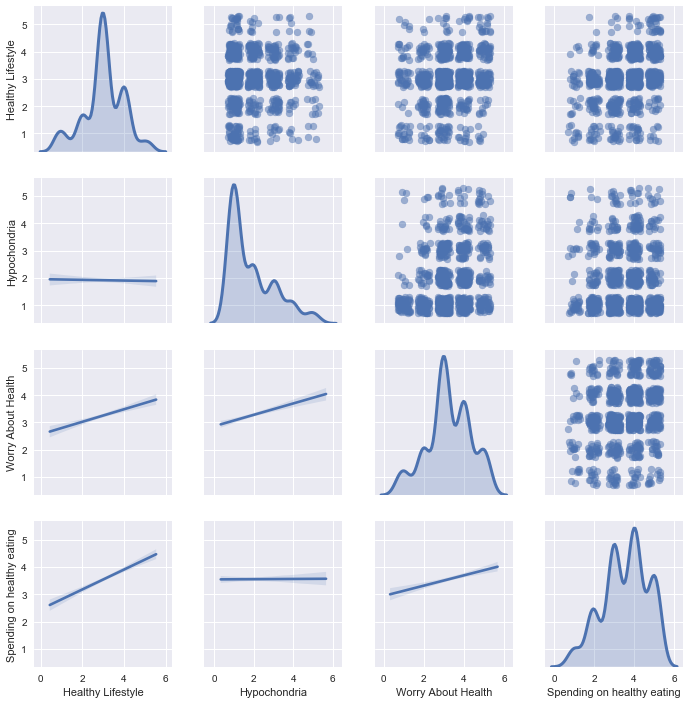

In [101]:
#Scatterplot Matrix

#First, because our continuous variables overlap (1-5 scale), make a copy of the data to add jitter 
#to and plot.

survey_filtered_jittered = survey_filtered.loc[:, 'Healthy Lifestyle':'Spending on healthy eating']

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(survey_filtered_jittered.shape)),
    columns=survey_filtered_jittered.columns
)
# Combine the data and the noise.
survey_filtered_jittered = survey_filtered_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(survey_filtered_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3, shade=True)
plt.show()

                            Healthy Lifestyle  Hypochondria  \
Healthy Lifestyle                    1.000000      0.005861   
Hypochondria                         0.005861      1.000000   
Worry About Health                   0.200016      0.239956   
Spending on healthy eating           0.321955      0.004862   

                            Worry About Health  Spending on healthy eating  
Healthy Lifestyle                     0.200016                    0.321955  
Hypochondria                          0.239956                    0.004862  
Worry About Health                    1.000000                    0.195521  
Spending on healthy eating            0.195521                    1.000000  


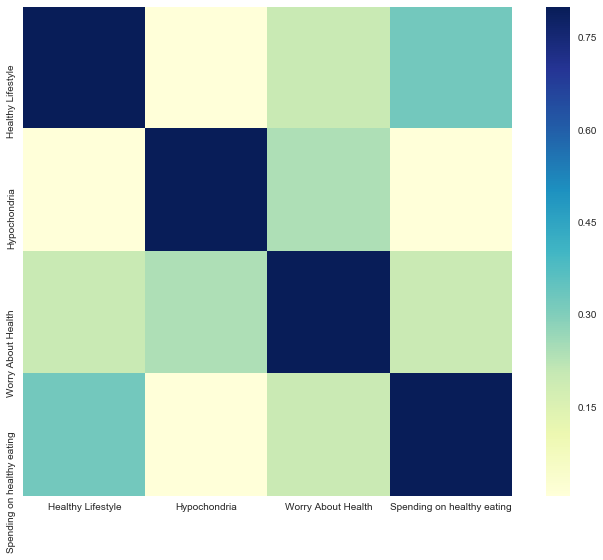

In [102]:
# Make the correlation matrix.
corr_matrix = survey_filtered.corr()
print(corr_matrix)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap='YlGnBu')
plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


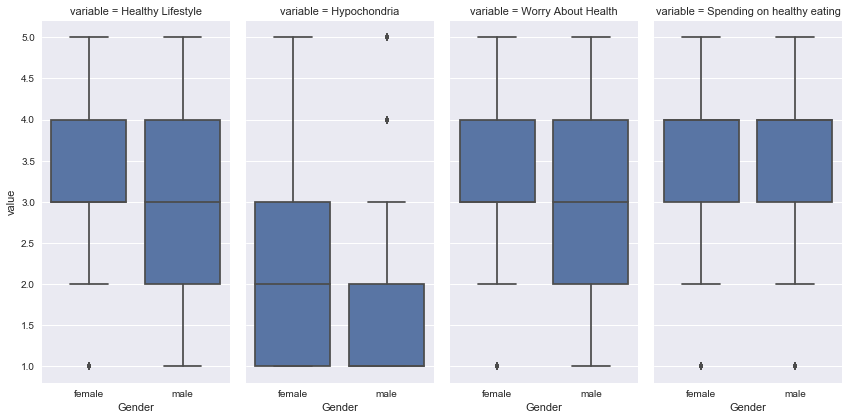

       Healthy Lifestyle                                               \
                   count      mean       std  min  25%  50%  75%  max   
Gender                                                                  
female             585.0  3.087179  0.848603  1.0  3.0  3.0  4.0  5.0   
male               402.0  2.962687  1.038463  1.0  2.0  3.0  4.0  5.0   

       Hypochondria                                               \
              count      mean       std  min  25%  50%  75%  max   
Gender                                                             
female        585.0  1.984615  1.194208  1.0  1.0  2.0  3.0  5.0   
male          402.0  1.803483  1.082017  1.0  1.0  1.0  2.0  5.0   

       Spending on healthy eating                                          \
                            count      mean       std  min  25%  50%  75%   
Gender                                                                      
female                      585.0  3.547009  1.097130  1.0  3.

In [104]:
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
survey_filtered_continuous = survey_filtered.loc[:, ['Gender', 'Healthy Lifestyle', 'Hypochondria', 'Worry About Health', 'Spending on healthy eating']]
survey_filtered_melted = survey_filtered_continuous
survey_filtered_melted = pd.melt(survey_filtered_melted, id_vars=['Gender'])

g = sns.FacetGrid(survey_filtered_melted, col="variable", size=6, aspect=.5)
g = g.map(sns.boxplot, "Gender", "value")
plt.show()

# Descriptive statistics by group.
print(survey_filtered_continuous.groupby('Gender').describe())

# Test whether group differences are significant.
for col in survey_filtered_continuous.loc[:,'Healthy Lifestyle':'Spending on healthy eating'].columns:
    print(col)
    print(stats.ttest_ind(
        survey_filtered_continuous[survey_filtered_continuous['Gender'] == 'male'][col],
        survey_filtered_continuous[survey_filtered_continuous['Gender'] == 'female'][col]))

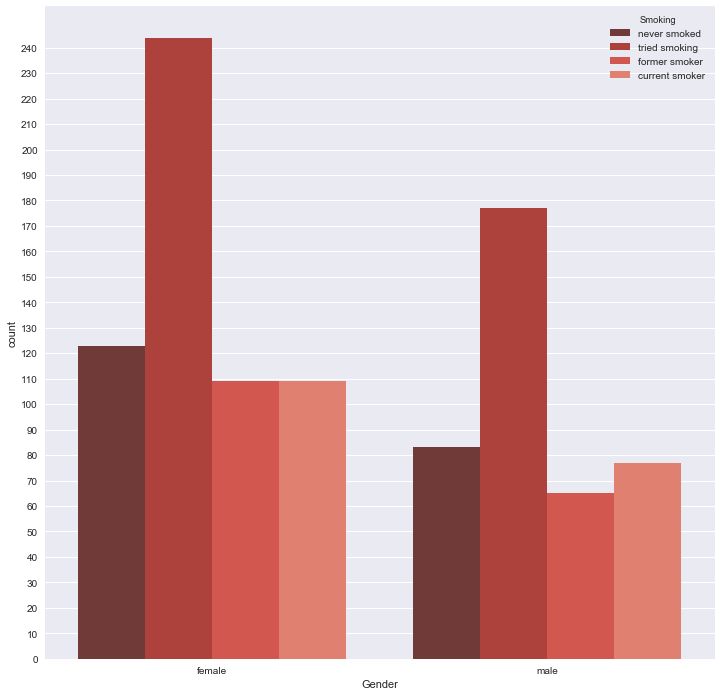

Smoking  current smoker  former smoker  never smoked  tried smoking
Gender                                                             
female              109            109           123            244
male                 77             65            83            177
Power_divergenceResult(statistic=202.86018237082067, pvalue=2.844733883560845e-40)


In [96]:
#Look at Gender vs. Smoking

# Plot counts for each combination of levels.
plt.figure(figsize=[12,12])
plt.yticks(np.arange(0, 250, 10))
sns.countplot(x='Gender', hue="Smoking", data=survey_filtered, palette="Reds_d")
plt.show()

# Table of counts
counttable_smoking = pd.crosstab(survey_filtered['Gender'], survey_filtered['Smoking'])
print(counttable_smoking)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable_smoking, axis=None))

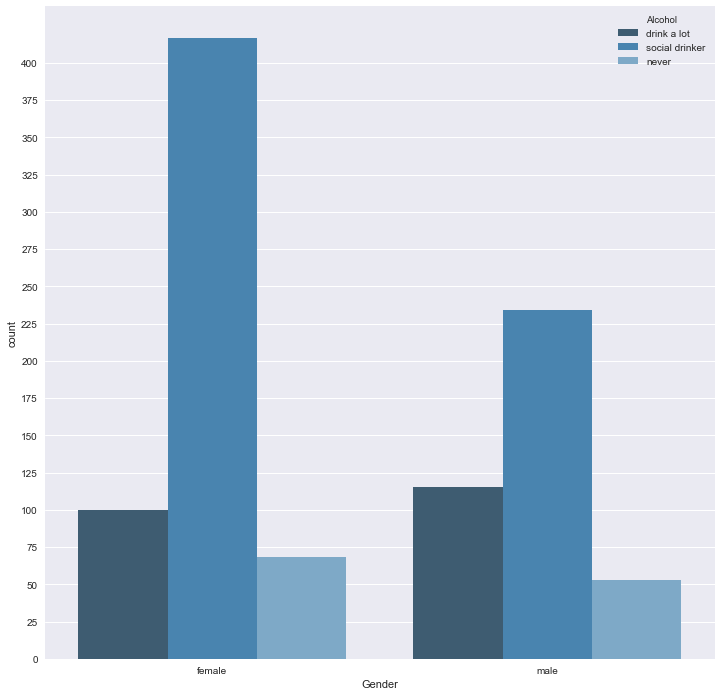

Alcohol  drink a lot  never  social drinker
Gender                                     
female           100     68             417
male             115     53             234
Power_divergenceResult(statistic=589.3100303951367, pvalue=4.1256879001428336e-125)


In [97]:
#Look at Gender vs. Alcohol

# Plot counts for each combination of levels.
plt.figure(figsize=[12,12])
plt.yticks(np.arange(0, 425, 25))
sns.countplot(x='Gender', hue="Alcohol", data=survey_filtered, palette="Blues_d")
plt.show()

# Table of counts
counttable_alcohol = pd.crosstab(survey_filtered['Gender'], survey_filtered['Alcohol'])
print(counttable_alcohol)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable_alcohol, axis=None))

# 10 New Features
1. Drinker - Alcohol = 'social drinker' and 'drinks a lot'
2. Smoker - Smoking = 'former smoker' and 'current smoker'
3. Drinker Healthy Lifestyle - Alcohol = 'social drinker' and 'drinks a lot', Healthy Lifestyle>= 3
4. Smoker Healthy Lifestyle - Smoking = 'current smoker', Healthy Lifestyle >= 3
5. Non Drinker Unhealthy Lifestyle - Alcohol = 'never', Healthy Lifestyle <= 3
6. Non Smoker Unhealthy Lifestyle - Smoking = 'never smoked', Healthy Lifestyle <= 3
7. Drinker Not Worried About Health - Alcohol = 'social drinker' and 'drinks a lot', Worry About Health <= 3
8. Smoker Not Worried About Health - Smoking = 'current smoker', Worry About Health <= 3
9. Healthy Lifestyle Doesn't Spend on Healthy Eating - Healthy Lifestyle >= 3, Spending on healthy eating <= 3
10. Healthy Lifestyle and Hypochondriac - Healthy Lifestyle >= 3 and Hypochondriac >= 3

In [111]:
#Make dummies and create DataFrame to start collecting features

features = pd.get_dummies(survey_filtered['Gender'])

In [112]:
#Start creating features above. First is 'Drinker'

features['Drinker'] = np.where((survey_filtered['Alcohol'].isin(['social drinker', 'drinks a lot'])), 1, 0)
print(pd.crosstab(features['Drinker'], survey_filtered['Gender']))

Gender   female  male
Drinker              
0           168   168
1           417   234


In [115]:
#Create 'Smoker' feature

features['Smoker'] = np.where((survey_filtered['Smoking'].isin(['former smoker', 'current smoker'])), 1, 0)
print(pd.crosstab(features['Smoker'], survey_filtered['Gender']))

Gender  female  male
Smoker              
0          367   260
1          218   142


In [121]:
#Create 'Drinker Healthy Lifestyle' feature

features['Drinker Healthy Lifestyle'] = np.where((survey_filtered['Alcohol'].isin(['social drinker', 'drinks a lot'])) & (survey_filtered['Healthy Lifestyle'] >= 3), 1, 0)
print(pd.crosstab(features['Drinker Healthy Lifestyle'], survey_filtered['Gender']))

Gender                     female  male
Drinker Healthy Lifestyle              
0                             237   222
1                             348   180


In [122]:
#Create 'Smoker Healthy Lifestyle' feature

features['Smoker Healthy Lifestyle'] = np.where((survey_filtered['Smoking'] == 'current smoker') & (survey_filtered['Healthy Lifestyle'] >= 3), 1, 0)
print(pd.crosstab(features['Smoker Healthy Lifestyle'], survey_filtered['Gender']))

Gender                    female  male
Smoker Healthy Lifestyle              
0                            501   357
1                             84    45


In [123]:
#Create 'Non Drinker Unhealthy Lifestyle' feature

features['Non Drinker Unhealthy Lifestyle'] = np.where((survey_filtered['Alcohol'] == 'never') & (survey_filtered['Healthy Lifestyle'] <= 3), 1, 0)
print(pd.crosstab(features['Non Drinker Unhealthy Lifestyle'], survey_filtered['Gender']))

Gender                           female  male
Non Drinker Unhealthy Lifestyle              
0                                   541   364
1                                    44    38


In [124]:
#Create 'Non Smoker Unhealthy Lifestyle' feature

features['Non Smoker Unhealthy Lifestyle'] = np.where((survey_filtered['Smoking'] == 'never smoked') & (survey_filtered['Healthy Lifestyle'] <= 3), 1, 0)
print(pd.crosstab(features['Non Smoker Unhealthy Lifestyle'], survey_filtered['Gender']))

Gender                          female  male
Non Smoker Unhealthy Lifestyle              
0                                  497   338
1                                   88    64


In [126]:
#Create 'Drinker Not Worried About Health' feature

features['Drinker Not Worried About Health'] = np.where((survey_filtered['Alcohol'].isin(['social drinker', 'drinks a lot'])) & (survey_filtered['Worry About Health'] <= 3), 1, 0)
print(pd.crosstab(features['Drinker Not Worried About Health'], survey_filtered['Gender']))

Gender                            female  male
Drinker Not Worried About Health              
0                                    351   255
1                                    234   147


In [127]:
#Create 'Smoker Not Worried About Health' feature

features['Smoker Not Worried About Health'] = np.where((survey_filtered['Smoking'] == 'current smoker') & (survey_filtered['Worry About Health'] <= 3), 1, 0)
print(pd.crosstab(features['Smoker Not Worried About Health'], survey_filtered['Gender']))

Gender                           female  male
Smoker Not Worried About Health              
0                                   519   345
1                                    66    57


In [129]:
#Create 'Healthy Lifestyle Doesn't Spend on Healthy Eating' feature

features['Healthy Lifestyle Doesnt Spend on Healthy Eating'] = np.where((survey_filtered['Spending on healthy eating'] <= 3) & (survey_filtered['Healthy Lifestyle'] >= 3), 1, 0)
print(pd.crosstab(features['Healthy Lifestyle Doesnt Spend on Healthy Eating'], survey_filtered['Gender']))

Gender                                            female  male
Healthy Lifestyle Doesnt Spend on Healthy Eating              
0                                                    386   285
1                                                    199   117


In [130]:
#Create 'Healthy Lifestyle and Hypochondriac' Feature

features['Healthy Lifestyle and Hypochondriac'] = np.where((survey_filtered['Hypochondria'] >= 3) & (survey_filtered['Healthy Lifestyle'] >= 3), 1, 0)
print(pd.crosstab(features['Healthy Lifestyle and Hypochondriac'], survey_filtered['Gender']))

Gender                               female  male
Healthy Lifestyle and Hypochondriac              
0                                       450   331
1                                       135    71


# Select 5 Best Features:
1. 
2. 
3. 
4. 
5. 
